In [4]:
import squidpy as sq
import scanpy as sc
import scipy as scp
import numpy as np 
import pandas as pd
import scanorama as scan
from matplotlib.pyplot import rc_context
import liana as li
from liana.method import singlecellsignalr, connectome, cellphonedb, natmi, logfc, cellchat, geometric_mean, rank_aggregate

In [5]:
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3

-----
anndata     0.10.5.post1
scanpy      1.9.8
-----
OpenGL                      3.1.7
PIL                         9.4.0
PyQt5                       NA
annoy                       NA
appdirs                     1.4.4
appnope                     0.1.3
arrow                       1.2.3
asciitree                   NA
asttokens                   NA
attr                        22.2.0
babel                       2.14.0
backcall                    0.2.0
cachey                      0.2.1
certifi                     2022.12.07
cffi                        1.15.1
charset_normalizer          3.1.0
cloudpickle                 3.0.0
comm                        0.1.2
cycler                      0.10.0
cython_runtime              NA
dask                        2024.2.1
dask_image                  2023.08.1
datashader                  0.16.0
datatree                    0.0.14
dateutil                    2.8.2
debugpy                     1.6.6
decorator                   5.1.1
defusedxml              

In [6]:
sclc = sc.read_h5ad('data/sclcHV.h5ad')

In [7]:
sclc.raw.X
?rank_aggregate.__call__

Signature:
rank_aggregate.__call__(
    adata: 'an.AnnData | MuData',
    groupby: 'str',
    resource_name: 'str' = 'consensus',
    expr_prop: 'float' = 0.1,
    min_cells: 'int' = 5,
    groupby_pairs: 'Optional[DataFrame]' = None,
    base: 'float' = 2.718281828459045,
    aggregate_method: 'str' = 'rra',
    consensus_opts: 'Optional[list]' = None,
    return_all_lrs: 'bool' = False,
    key_added: 'str' = 'liana_res',
    use_raw: 'Optional[bool]' = True,
    layer: 'Optional[str]' = None,
    de_method: 'str' = 't-test',
    n_perms: 'int' = 1000,
    seed: 'int' = 1337,
    n_jobs: 'int' = 1,
    resource: 'Optional[DataFrame]' = None,
    interactions: 'Optional[list]' = None,
    mdata_kwargs: 'dict' = {},
    inplace: 'bool' = True,
    verbose: 'Optional[bool]' = False,
)
Docstring:
Get an aggregate of ligand-receptor scores from multiple methods.

Parameters
----------
adata
    Annotated data object.
groupby
    Key to be used for grouping.
resource_name
    Name of the r

/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


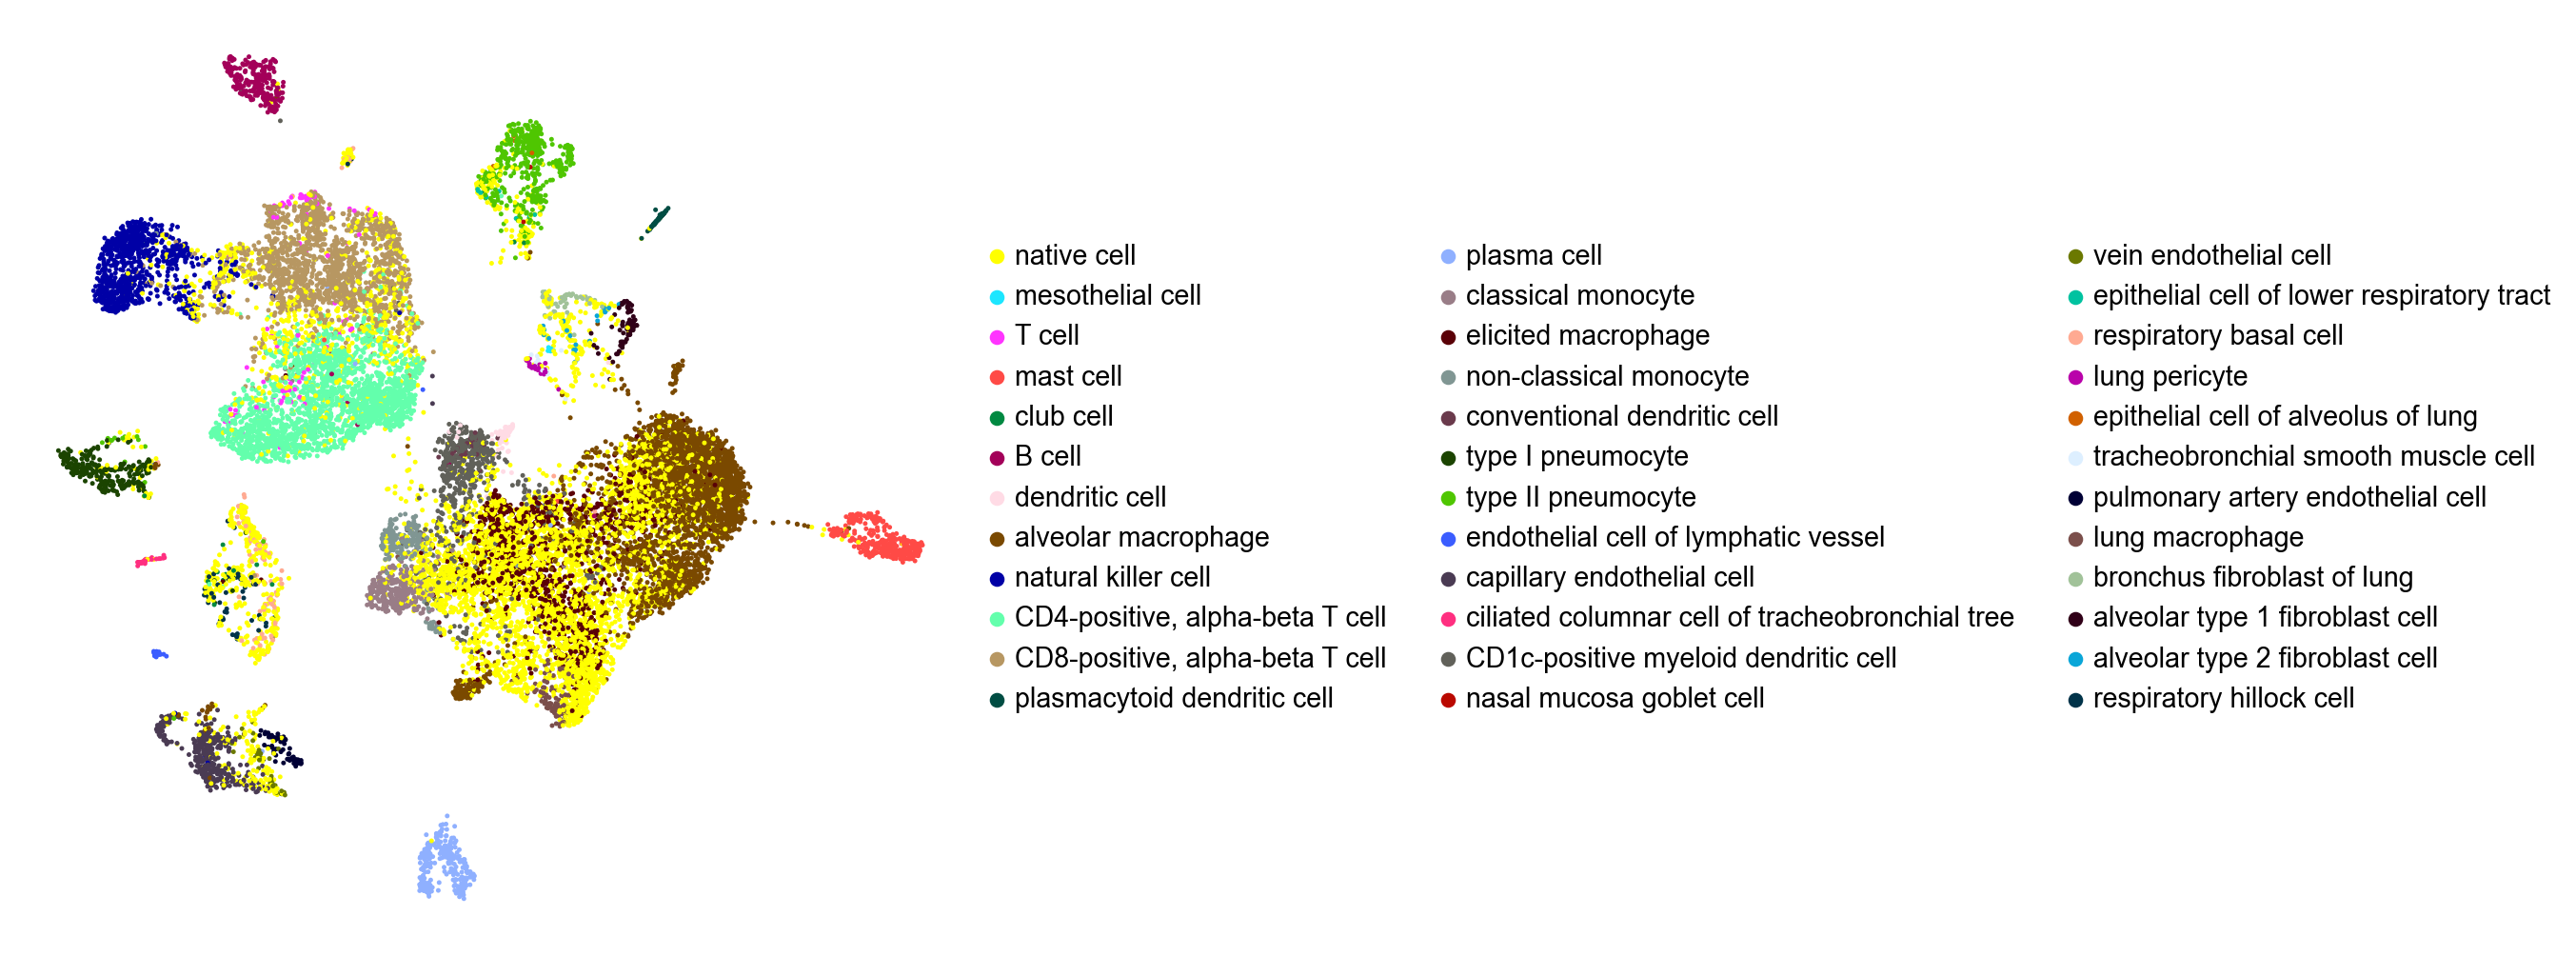

In [8]:
sc.pl.umap(sclc, color='cell_type', title='', size=20, frameon=False)

In [10]:
rank_aggregate(sclc, groupby='cell_type', expr_prop=0.1, verbose=True, key_added='agg_res')

Using `.raw`!
/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:956: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['A1BG', 'A1BG-AS1', 'A2M', 'A2M-AS1', 'A2ML1']

    Inferred to be: categorical

29 features of mat are empty, they will be removed.
/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/liana/method/_pipe_utils/_pre.py:148: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/liana/method/_pipe_utils/_pre.py:151: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observe

Generating ligand-receptor stats for 18375 samples and 1501 features
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/liana/method/sc/_liana_pipe.py:256: ImplicitModificationWarning: Setting element `.layers['scaled']` of view, initializing view as actual.


Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|██████████| 1000/1000 [00:13<00:00, 73.06it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR


In [17]:
lr_df = sclc.uns['agg_res']
lr_df.to_csv('ligandReceptor.csv')

In [30]:
lr_df.

0.4845213

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


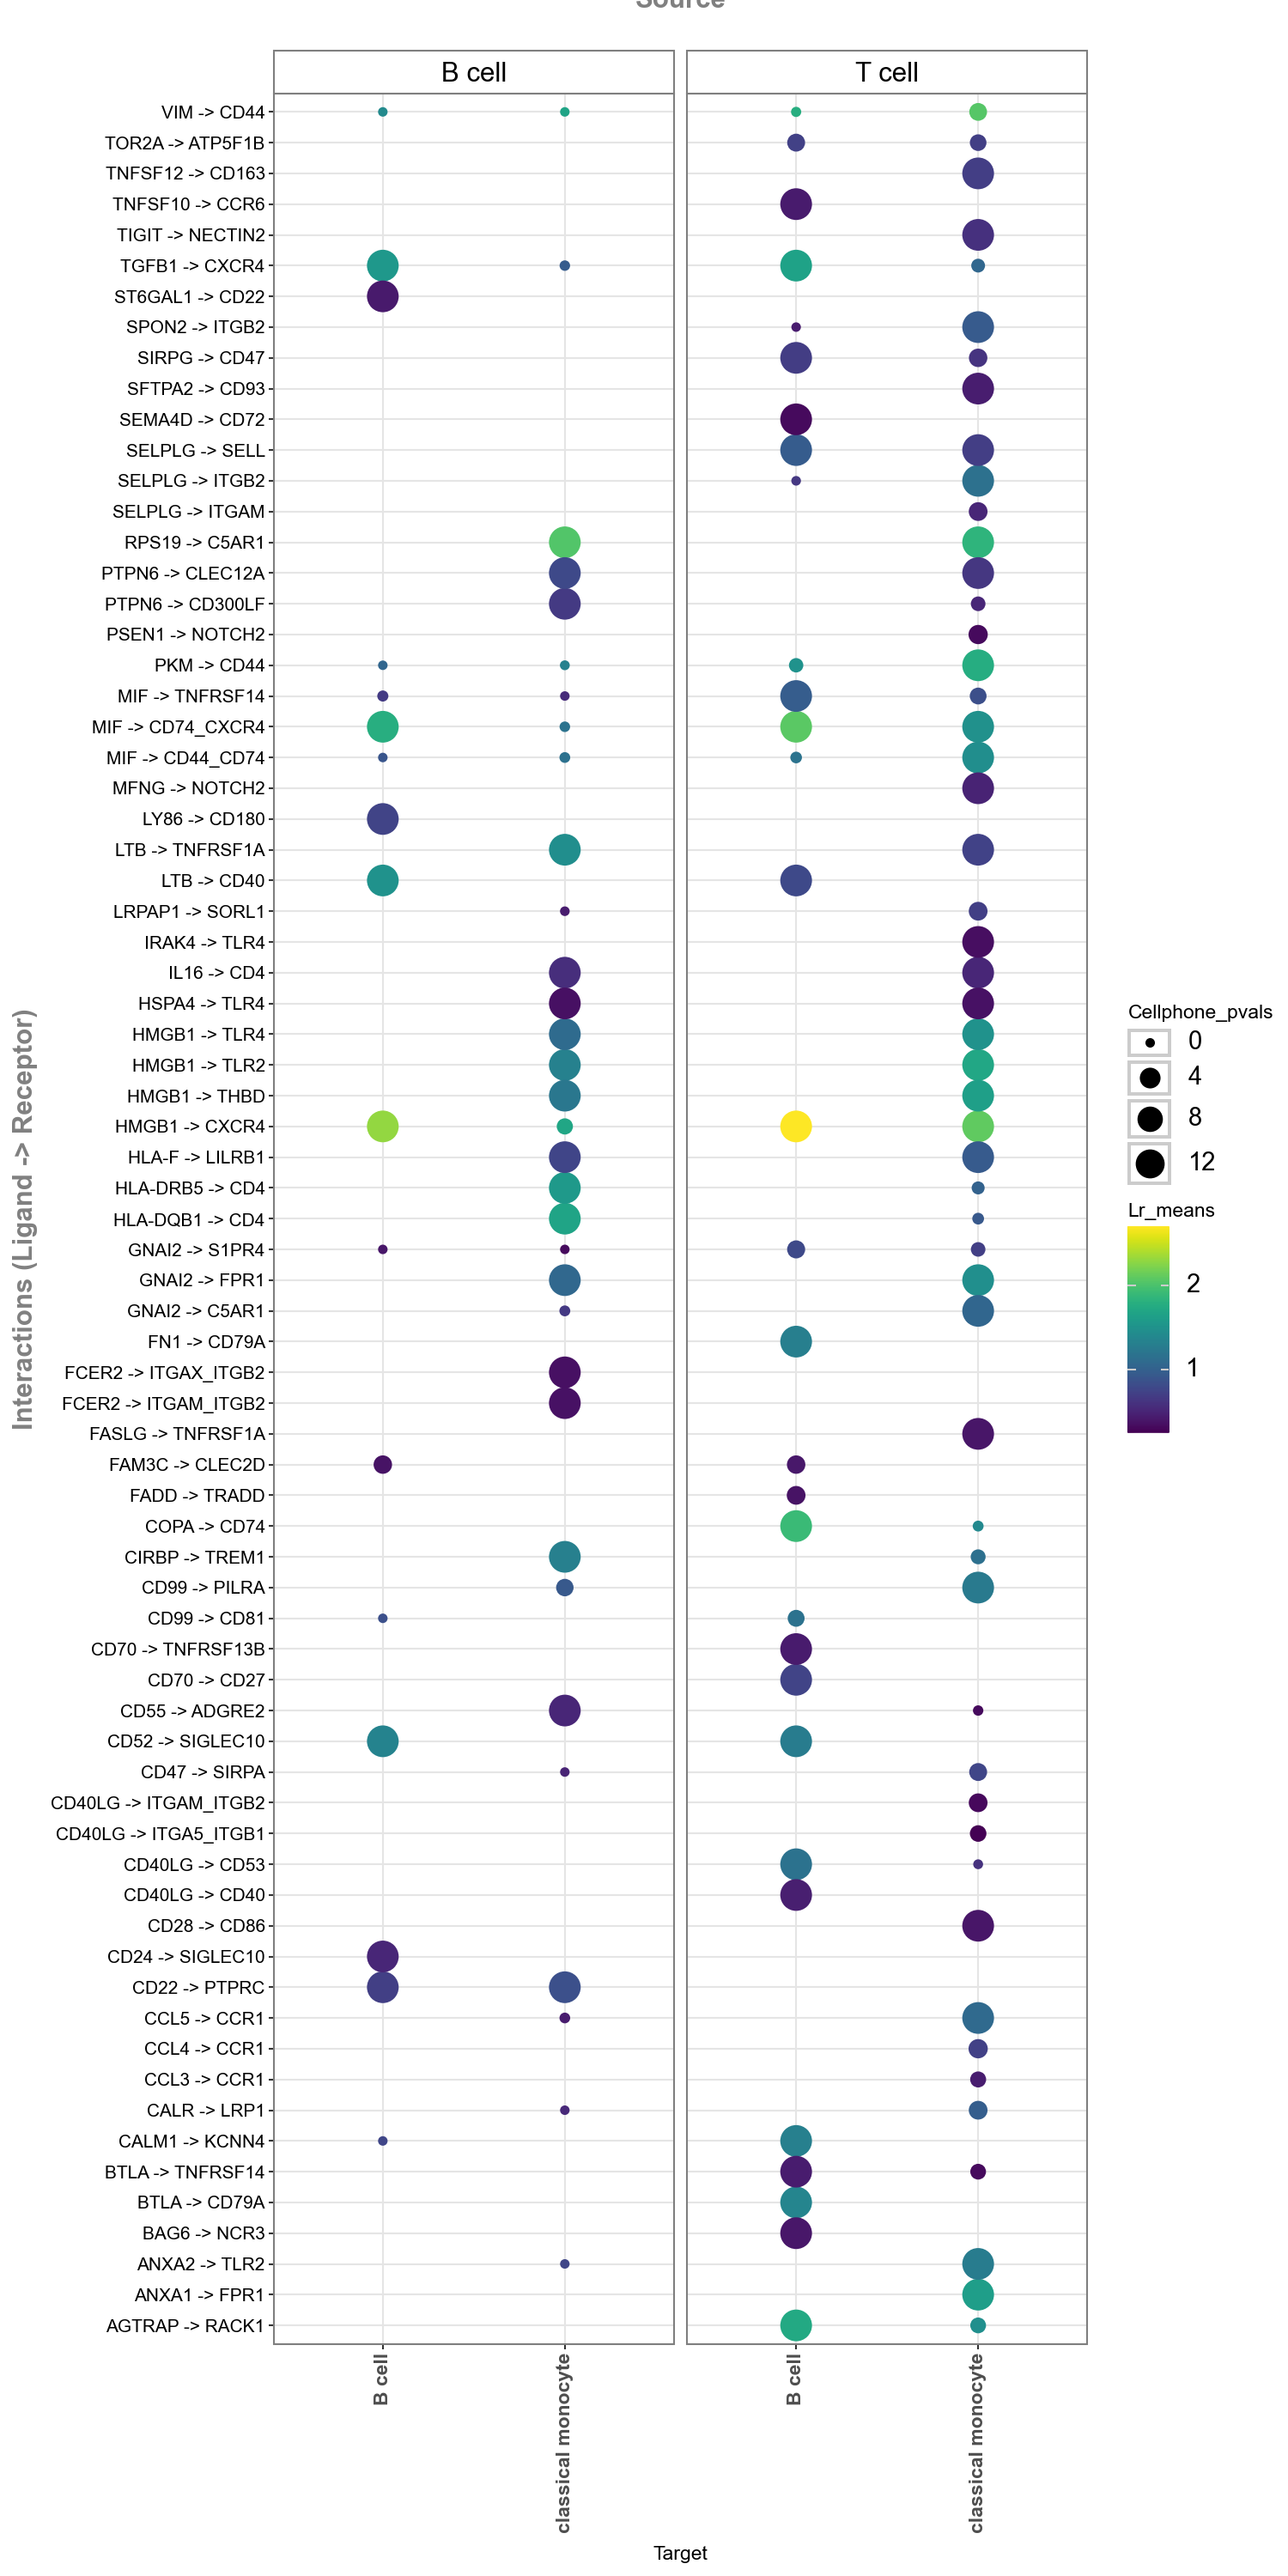

In [25]:
li.pl.dotplot(adata = sclc,
              colour='lr_means',
              size='cellphone_pvals',
              inverse_size=True, # we inverse sign since we want small p-values to have large sizes
              source_labels=['B cell', 'T cell'],
              target_labels=['B cell', 'classical monocyte'],
              figure_size=(10, 20),
              # finally, since cpdbv2 suggests using a filter to FPs
              # we filter the pvals column to <= 0.05
              filter_fun=lambda x: x['cellphone_pvals'] <= 0.05,
              uns_key='agg_res' # uns_key to use, default is 'liana_res'
             )
